# wykonaj implementację funkcji plot_state_borders(), ale dla kraju innego niż USA,należy pamiętać o aktualizacji współrzędnych geograficznych  

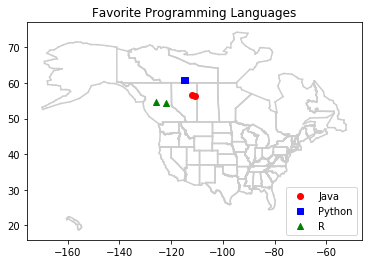

In [17]:
from collections import Counter
import math, random
import matplotlib.pyplot as plt
import re

cities = [(-114.491928,60.792196,'Python'),(-114.997299,60.792196,'Python'),(-111.840279,56.712446,'Java'),(-110.653756,56.397591,'Java'),(-125.781929,54.701245,'R'),(-122.167427,54.324961,'R')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]


segments = []
points = []

lat_long_regex = "<point lat=\"(.*)\" lng=\"(.*)\""

with open("newCanada.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))
        

def plot_state_borders(plt, color='0.8'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)



# key is language, value is pair (longitudes, latitudes)
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

# we want each language to have a different marker and color
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=10)

plot_state_borders(plt)    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
#plt.axis([-130,-60,55,75]) # set the axes
plt.title("Favorite Programming Languages")
plt.show()